In [2]:
pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 35.7 MB/s eta 0:00:00


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter
from skimage.measure import label
import rasterio
import pandas as pd
from rasterio.plot import show

In [4]:
wallmatrix2 = pd.read_csv('wallmatrix2.csv')
wallmatrix2 = wallmatrix2.drop(wallmatrix2.columns[0], axis=1)
wallmatrix2

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V991,V992,V993,V994,V995,V996,V997,V998,V999,V1000
0,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
1,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
2,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
3,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
4,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
996,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
997,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
998,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50


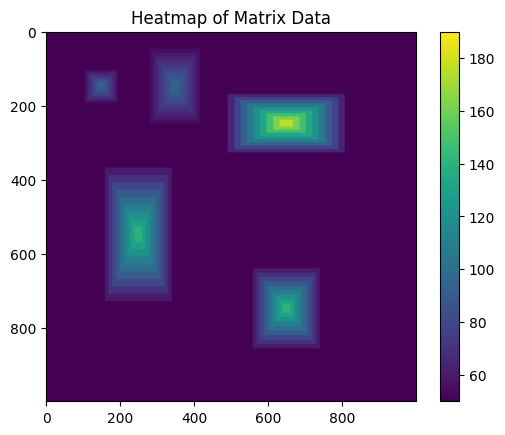

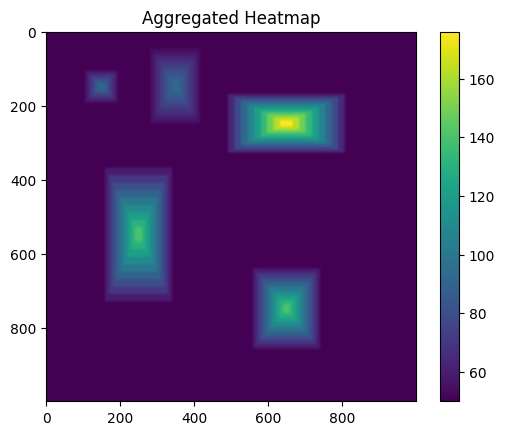

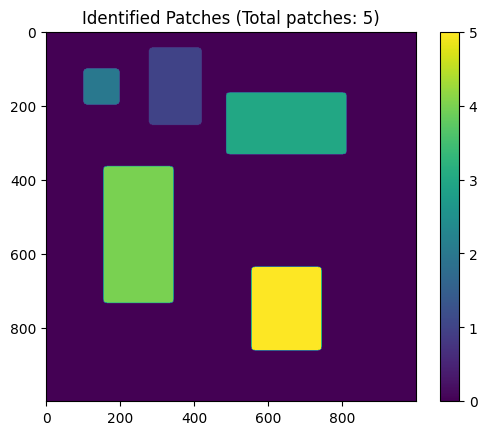

<Figure size 640x480 with 0 Axes>

In [7]:
plt.imshow(wallmatrix2)
plt.colorbar()
plt.title('Heatmap of Matrix Data')
plt.show()
plt.savefig('matrix_data_heatmap.png')


aggregate = 10
aggregated_data = uniform_filter(wallmatrix2, size=aggregate)


plt.imshow(aggregated_data)
plt.colorbar()
plt.title('Aggregated Heatmap')
plt.show()
plt.savefig('aggregated_heatmap.png')


threshold_value = 50
high_value_areas = aggregated_data
for i in range(len(high_value_areas)):
  for j in range(len(high_value_areas[0])):
    if aggregated_data[i][j] > threshold_value:
      high_value_areas[i][j] = True
    else:
      high_value_areas[i][j] = False

labeled_patches, num_patches = label(high_value_areas, return_num=True)

plt.imshow(labeled_patches)
plt.colorbar()
plt.title(f'Identified Patches (Total patches: {num_patches})')
plt.show()
plt.savefig('high_stress_patches.png')
